In [11]:
!pip install pandas > /dev/null 2>&1
!pip install numpy > /dev/null 2>&1
!pip install seaborn > /dev/null 2>&1

In [2]:
# Model Import Statements
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 

# Visualisation Import Statements
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import precision_recall_curve, average_precision_score


# Logistic Regression Model

In [3]:
# Read Dataset
df = pd.read_csv('dataset_processed.csv')

# Split Dataframe into Features and Target

x = df.drop(['Outcome', 'id', 'profit_2', 'profit_x','odds_ft_x', 'odds_ft_2'], axis=1) #Features
y = df['Outcome']

# Split Dataframe into Train and Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
# Initialize Logistic Regression model with specified hyperparameters

log_reg = LogisticRegression(penalty = 'l2', max_iter=1000, class_weight='balanced')

# Train model on the training data
log_reg.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [5]:
# Make predictions on the test data using the trained model
predictions = log_reg.predict(x_test)

# Calculate the accuracy of the model on the test data
acc = accuracy_score(predictions, y_test)
print(f"Accuracy: {acc}")

Accuracy: 0.7589339794064204


# Visualizing Model + Quantitative Metrics

## Importance by Feature Chart

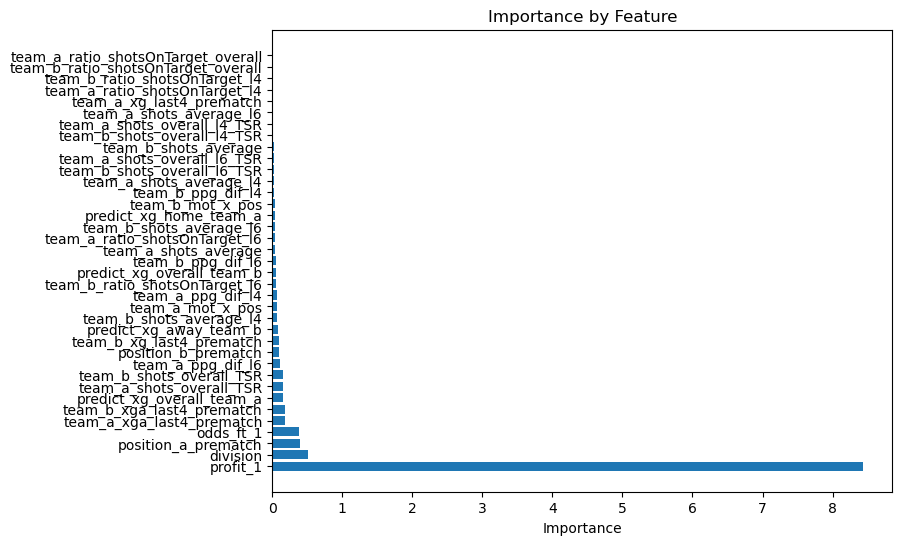

In [6]:
# Generating and plotting the Feature Importance Chart for Logistic Regression
feature_importance = np.abs(log_reg.coef_[0])
features = x_train.columns
idxs = np.argsort(feature_importance)[::-1]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(range(len(features)), feature_importance[idxs], align='center')
plt.yticks(range(len(features)), np.array(features)[idxs])
plt.xlabel('Importance')
plt.title('Importance by Feature')
plt.show()

## Confusion Matrix

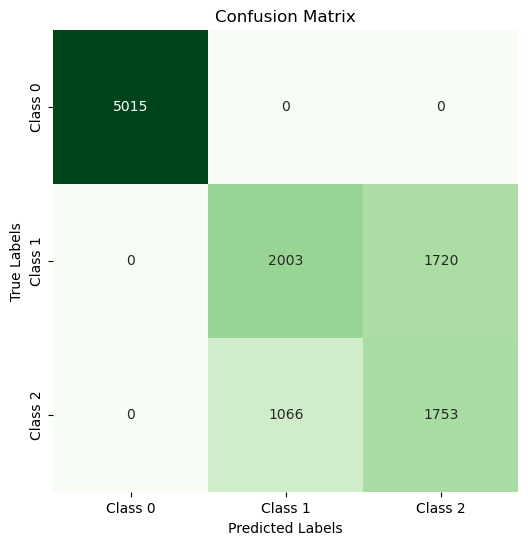

In [7]:
# Generating and plotting the confusion matrix
cm = confusion_matrix(predictions, y_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Classification Report

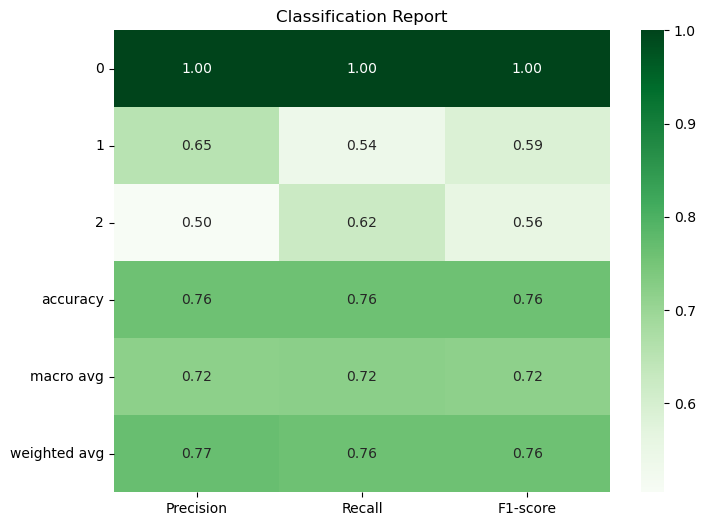

In [8]:
# Generating and plotting the classification report
class_report = classification_report(predictions, y_test, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose().iloc[:, :-1]

plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.astype(float), annot=True, cmap='Greens', cbar=True, fmt='.2f', 
            xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=class_report_df.index)
plt.title('Classification Report')
plt.show()

# ROC Curve

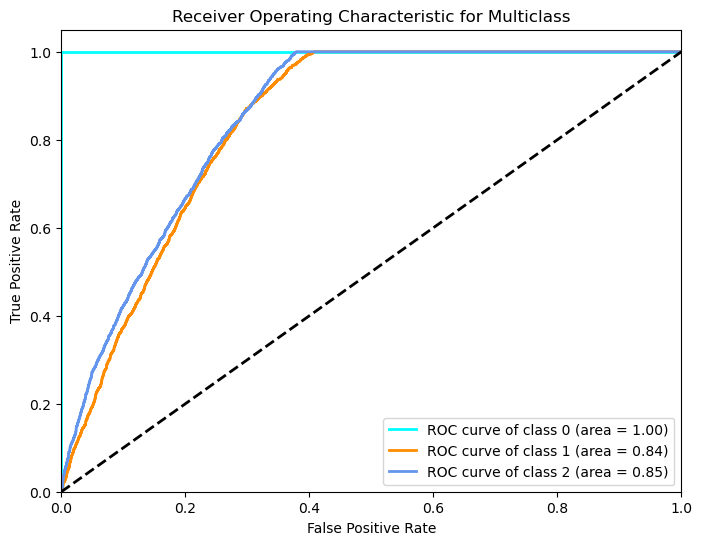

In [9]:
# Generating and plotting the ROC curve

y_test_bin = label_binarize(y_test, classes=log_reg.classes_)
n_classes = y_test_bin.shape[1]
y_score = OneVsRestClassifier(log_reg).fit(x_train, y_train).predict_proba(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()

# Precision - Recall Curve

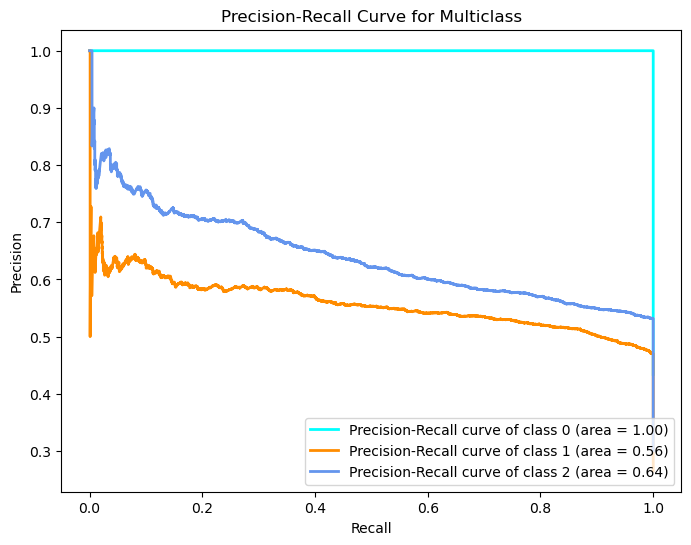

In [10]:
# Generating and plotting the Precision-Recall curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-Recall curve of class {0} (area = {1:0.2f})'
             ''.format(i, average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()